In [1]:
# import needed files
! pip install pandas -q
! pip install numpy -q
! pip install matplotlib -q
! pip install seaborn  -q
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#import data
data = pd.read_csv("mental_health_digital_behavior_data.csv")
data.head()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7


In [3]:
#Check general info of the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   daily_screen_time_min    500 non-null    float64
 1   num_app_switches         500 non-null    int64  
 2   sleep_hours              500 non-null    float64
 3   notification_count       500 non-null    int64  
 4   social_media_time_min    500 non-null    float64
 5   focus_score              500 non-null    float64
 6   mood_score               500 non-null    float64
 7   anxiety_level            500 non-null    float64
 8   digital_wellbeing_score  500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [4]:
#Check stats of the data
data.describe()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,360.437800,49.840000,6.557400,79.51200,121.771800,6.998000,8.988600,8.451800,52.310400
std,58.782476,7.340993,1.192043,23.97974,43.809443,0.618742,0.519104,2.134425,7.943186
min,180.000000,30.000000,3.000000,20.00000,30.000000,5.500000,7.400000,1.000000,34.600000
25%,317.975000,44.000000,5.800000,63.00000,91.875000,6.600000,8.600000,7.275000,46.800000
50%,360.800000,50.000000,6.500000,80.00000,119.550000,7.000000,9.000000,9.700000,51.000000
75%,398.175000,55.000000,7.325000,96.00000,149.500000,7.400000,9.300000,10.000000,56.600000
max,591.200000,72.000000,10.000000,158.00000,296.700000,8.600000,10.000000,10.000000,80.800000


In [5]:
#Checking dupilcated data
duplicate_data = data.duplicated().sum()
duplicate_data

np.int64(0)

Checking data distribution.

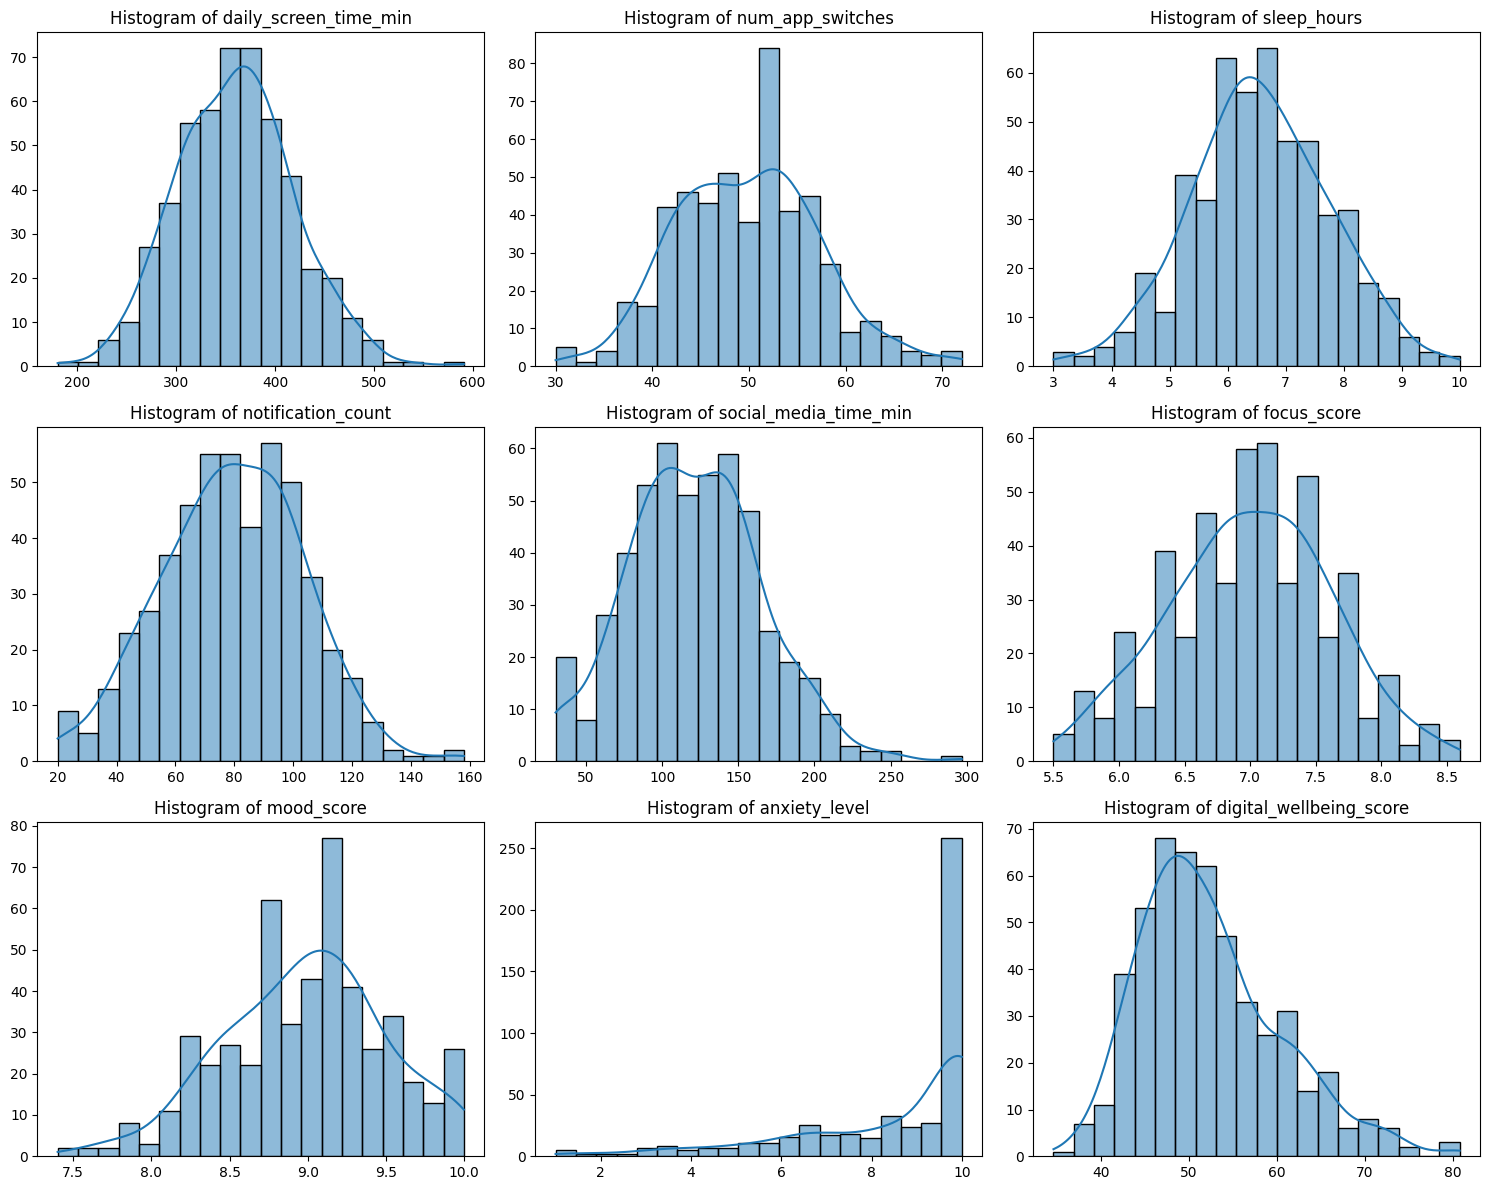

In [6]:
#Get columns user in data
cols = data.loc[:,'daily_screen_time_min':'digital_wellbeing_score'].columns
# Create subplots(3rows,3 cols)
fig,axes = plt.subplots(3,3, figsize = (15,12))
#Flatten axes 
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.histplot(data[col], bins=20, kde=True, ax = axes[i])
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

The data is distribution as follows;
Daily screen time is normally distributed with the lowest value around 200 and the highest value is around 600.Most of the people have a screen time of 300 to 420 minutes.
Number of app switches; This attribute is slighlty skewed the lowest value is 30 and highest value being slightly above 70.Most of the people have 40 to 60 number of app switches wth 52 having the highest number of occurance.
Number of sleep hours; The attribute has a normal distribution, with the lowest value is 3 hours and highest is 10 hours.Most people sleep for around 5 and 8 hours.
Number of notification counts; This atribute is slightly skewed on the right. The minimum number of notification is 20 and highest vale is 160. Most people receive 48 to 120 notification.
Social media time; This attribute is skewed to the left.The minimum value is around 45 and an outlier of about 300.However most people spend 100 to 160 minutes in social media
Focus score; Focus score is normmally distributed with minimum value of 5.5 as the minimum value and 8.5 as the highest.High number of occurances are between 7.0 to 7.2 
Moods score; Mood score is skewed to the left, the minimum value is 7.5 and highest is 10.The highest number of occurances is at 9.2.Most people have a mood score of between 8.4 to 9.6
Anxiety levels; Anxiety level is skewed to right, around 200 hundred people reported anxiety level of 10. 
digital wellbeing score; The digital well being is skewed to the left. The lowest value being about 36 and maximum an outlier of 80.Most of people have a digital value of 42 and 56 digital well being score.

CHECKING OUTLIERS

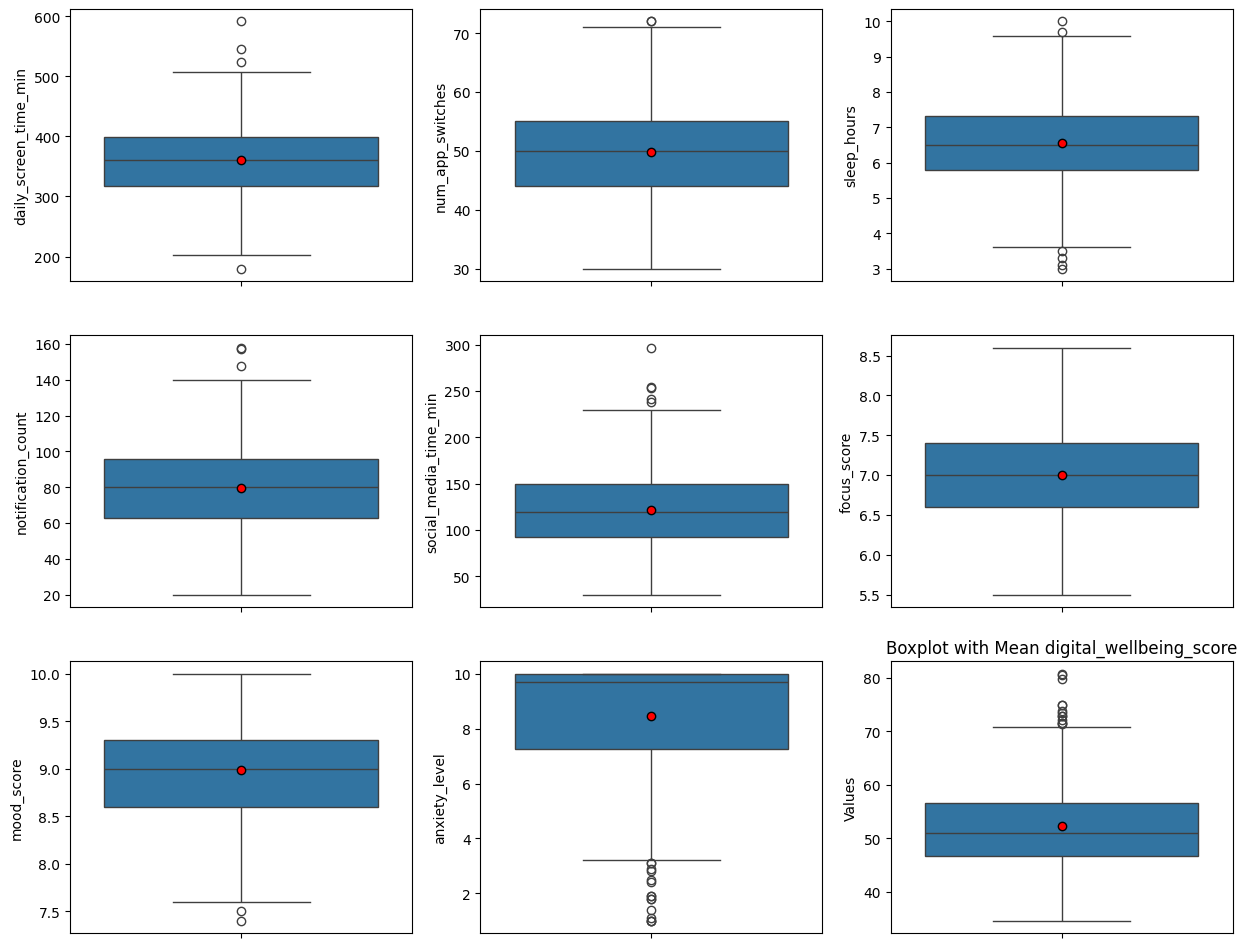

In [7]:
#Make the figure 
fig,axes = plt.subplots(3,3 ,figsize = (15,12))
axes = axes.flatten()
#Extract columns 
cols = data.loc[:,'daily_screen_time_min':'digital_wellbeing_score'].columns
#Loop through each data
for i, col in enumerate(cols):
    sns.boxplot(
        y=data[col],
        ax=axes[i],
        showmeans= True,
        meanprops = {'marker':'o', 'markerfacecolor':'red','markeredgecolor':'black'} )
    plt.title(f"Boxplot with Mean {col}")
    plt.ylabel("Values")
plt.show()

Investigating the outliers

In [8]:
# Class for outliers
class Outliers:
    def __init__ (self,data,column):
        self.data = data
        self.column= column

    def Find_outliers(self):
        #Find upper and lower values
        IQR_Lower = self.data[self.column].quantile(0.25)
        IQR_Upper = self.data[self.column].quantile(0.75)

        #Find IQR
        IQR = IQR_Upper - IQR_Lower

        #Find the bounds
        Upper_bound = IQR_Upper+1.5*IQR
        Lower_bound=  IQR_Lower-1.5* IQR

        # Find outliers
        Outliers_vals = self.data[(self.data[self.column]<Lower_bound )| (self.data[self.column]>Upper_bound)]

        return Outliers_vals

        



In [9]:
#Outliers for daily screen time

screen_time = Outliers(data, 'daily_screen_time_min')
screen_time_rows = screen_time.Find_outliers()
screen_time_rows


,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
179,523.2,48,7.8,93,81.3,6.7,9.6,6.1,62.0
209,591.2,53,6.1,64,158.5,5.5,8.6,9.9,40.9
262,180.0,53,6.3,72,104.2,8.1,8.8,6.5,61.8
478,544.7,53,9.0,41,124.1,5.8,9.1,5.5,63.7


In [10]:
#Outliers for num of app switches
outliers_app_switch = Outliers(data,'sleep_hours')
app_switch_rows = outliers_app_switch.Find_outliers()
app_switch_rows

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
93,340.3,54,3.1,35,122.5,7.3,9.0,5.8,51.0
145,406.9,42,3.0,87,99.4,7.3,8.8,10.0,38.2
169,314.8,48,10.0,67,150.1,7.4,8.5,9.2,62.1
304,358.7,52,3.3,76,199.0,7.3,9.0,10.0,39.0
480,352.3,52,3.5,94,114.8,7.0,8.5,10.0,38.3
488,461.2,49,9.7,85,159.4,7.8,8.8,9.9,60.3


In [11]:
#Outliers for sleep
Outliers_sleep = Outliers(data,'sleep_hours')
sleep_rows = Outliers_sleep.Find_outliers()
sleep_rows

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
93,340.3,54,3.1,35,122.5,7.3,9.0,5.8,51.0
145,406.9,42,3.0,87,99.4,7.3,8.8,10.0,38.2
169,314.8,48,10.0,67,150.1,7.4,8.5,9.2,62.1
304,358.7,52,3.3,76,199.0,7.3,9.0,10.0,39.0
480,352.3,52,3.5,94,114.8,7.0,8.5,10.0,38.3
488,461.2,49,9.7,85,159.4,7.8,8.8,9.9,60.3


Note on outliers
After investigating the outliers i reccomend contuining the analysis with them I will bin them into a special category.

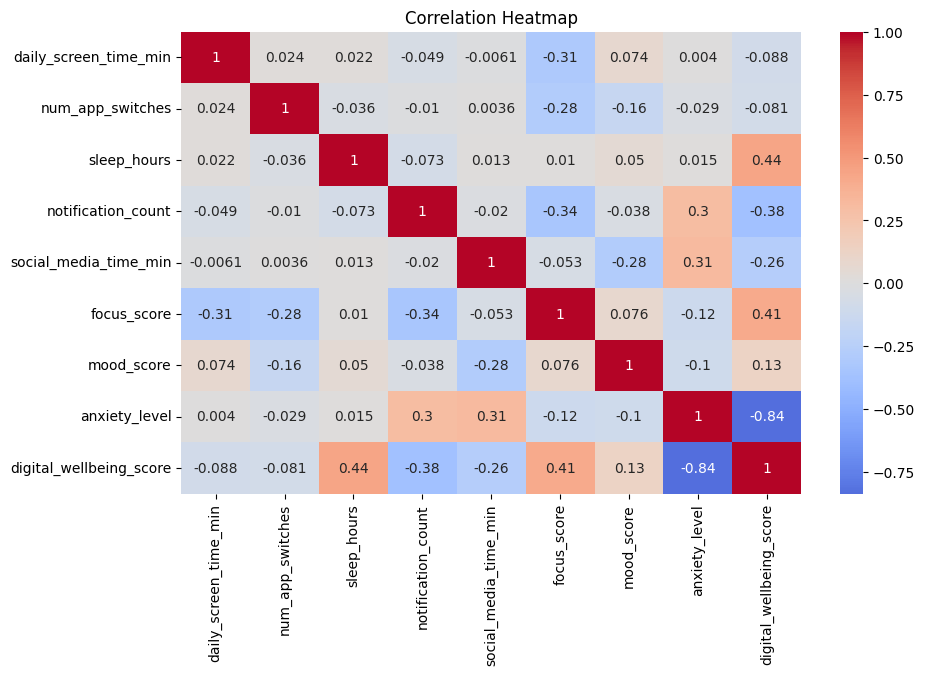

In [12]:
#Check correlation
correlation_matrix = data.corr()
correlation_matrix
plt.figure(figsize =(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


Note on correlation
Based on correlation values with less than 0.2 are less correlated, 0.3 to 0.6 are moderately correlated and above 0.7 to 1.0 are strongly correlated.Hence;
parameters i might consider based on correlation table ;  
anxiety levels and anxiety levels  -> -0.84
Digital well being and notification count -> -0.38
Sleep hours and digital well being -> 0.44
Anxiety levels vs notification count -> 0.30
social media time vs anxiety level -> 0.31
Digital well being vs focus score ->0.41


Start modelling the data using logistic regression


In [15]:
# Import the datasets.
! pip install scikit-learn -q 



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# Import the datasets.
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
# Make target feature binary
# Assume your target column is 'anxiety' (out of 10)
# Convert it to binary: 1 if 5 or above, 0 if below 5
y = data['anxiety_level']
data['anxiety_binary'] = data['anxiety_level'].apply(lambda x: 1 if x >= 5 else 0)



In [24]:
#Split the data into target and features
x = data.drop(['anxiety_level','anxiety_binary'], axis=1 )
y = data['anxiety_binary']

In [25]:
#Split the training and testing data.
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
#scale data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)



In [28]:
#Train the model.
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred,y_test)

c:\Users\pc\Desktop\Logistic Regression\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.99